# 26-4-UL-hierarchical_clustering-heart_disease
- k-means algorithm for clustering
- k-means is an iterative algorithm that takes the number of clusters (k) as given and groups the observations into k clusters based on the nearest mean of each cluster
- Pre-req
    * Cluster number is k: we provide the value of k to k-means, we need to determine the best value. we need to run k-means with several k values and choose the one that makes most sense to us.
    * Clusters are isotropic: meaning that they are uniform in all directions and the edges curve outward. 
    * Similar variance K-means also assumes all clusters have similar variance.
    
- Similar variance K-means also assumes all clusters have similar variance.
- The initial selection of centroids is important. Try the algorithm a few times with different starting centroids. The sklearn implementation has a nifty kmeans++ option (which is also the default) for initializing centroids that are distant from each other, and this approach is less likely to result in a flawed solution. Moreover, by default, sklearn runs the algorithm 10 times (we can set it to a different value using n_init parameter) with different centroid seeds and selects the best output in terms of inertia.
-  standardizing each variable is a common practice before applying k-means.

### Similarity metrics in hierarchical clustering


## Assignment

2. In this assignment, you'll be working with the heart disease dataset from the UC Irvine Machine Learning Repository.

* Produce dendrograms for the heart disease dataset using three different linkage methods: complete, average and ward. Which linkage method do you think produces more reasonable result?

* Apply agglomerative clustering to the heart disease data by setting n_clusters=2. Try the three linkage methods above and get ARI and silhouette scores for each of your solutions. Compare the results with each other and with that of the k-means solution that you implemented in the assignment of the previous checkpoint. Which algorithm and setting does perform better?


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage ###
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering ### 
from sklearn import metrics
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings("ignore")

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
heartdisease_df = pd.read_sql_query('select * from heartdisease',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [4]:
#The dataset needs some preprocessing. So, apply the following code before working with the dataset:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

In [5]:
# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)

# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

In [6]:
# Standardize the data.
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### Produce dendrograms for the heart disease dataset using three different linkage methods: complete, average and ward. 
### Which linkage method do you think produces more reasonable result?

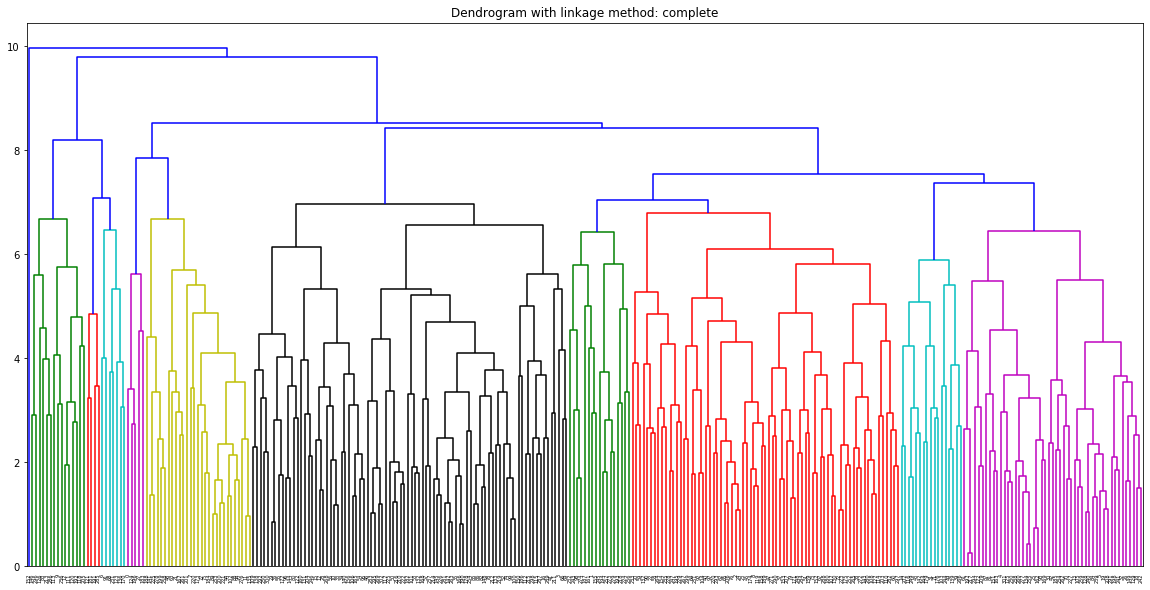

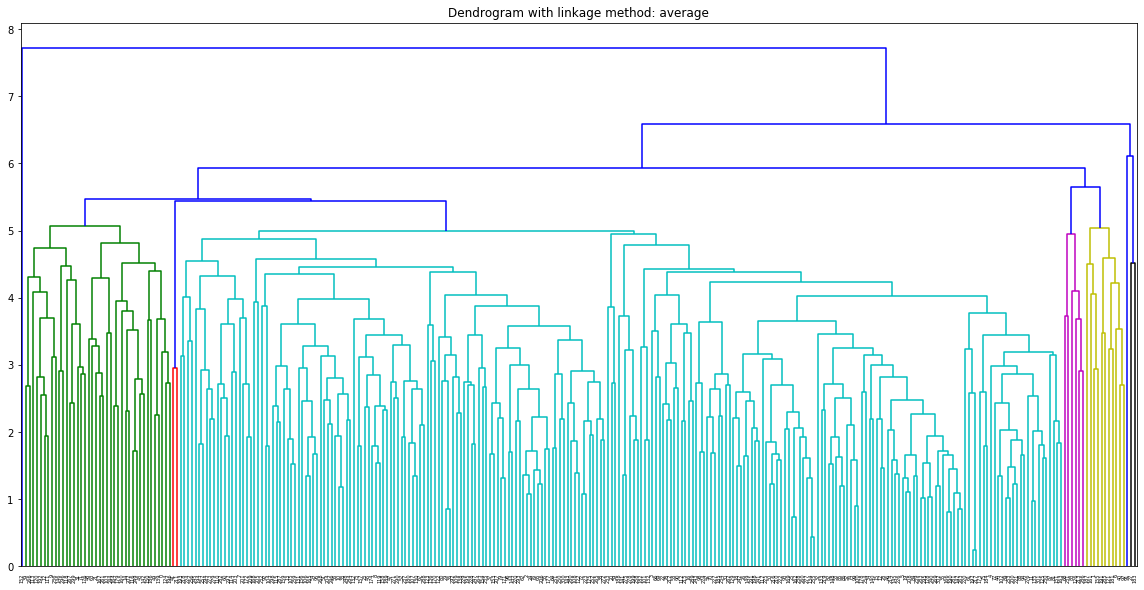

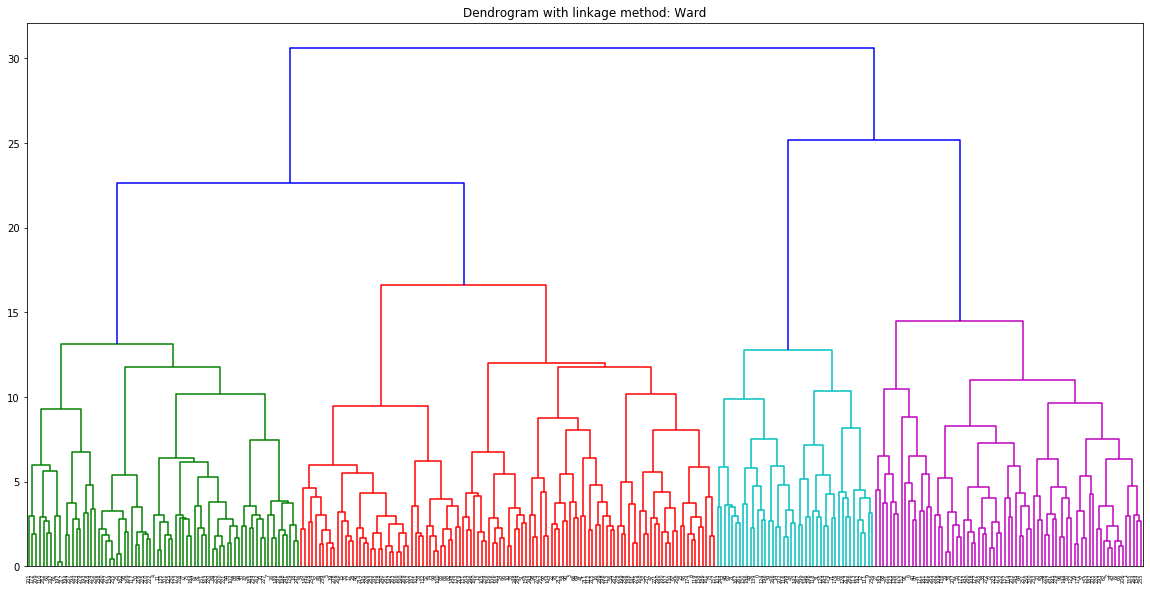

In [9]:
plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: complete")
dendrogram(linkage(X_std, method='complete'))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: average")
dendrogram(linkage(X_std, method='average'))
plt.show()

plt.figure(figsize=(20,10))
plt.title("Dendrogram with linkage method: Ward")
dendrogram(linkage(X_std, method='ward'))
plt.show()

#### The more reasonable result is that of the `ward` method's. 
The complete and average methods produced results that are hard to reconcile with the facts as their two cluster solutions has too few observations for one of the clusters.

### Apply agglomerative clustering to the heart disease data by setting n_clusters=2. 
### Try the three linkage methods above and get ARI and silhouette scores for each of your solutions. Compare the results with each other and with that of the k-means solution that you implemented in the assignment of the previous checkpoint. Which algorithm and setting does perform better?

In [10]:
### Three linkage methods
linkage_methods = ["ward", "average", "complete"]

In [11]:
# Defining the agglomerative clustering with averge
agg_cluster = AgglomerativeClustering(linkage="average", 
                                      affinity='cosine',
                                      n_clusters=2) ### Cluster = 2

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("ARI score of linkage method average: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method average: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------")


ARI score of linkage method average: 0.2940490133353465
Silhouette score of linkage method average: 0.14837359969689895
------------------------------------------------


In [12]:
# Defining the agglomerative clustering linkage = complete
agg_cluster = AgglomerativeClustering(linkage="complete",  
                                      affinity='cosine',
                                      n_clusters=2) 

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("ARI score of linkage method complete: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method complete: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))
print("------------------------------------------------")



ARI score of linkage method complete: 0.21394030618551016
Silhouette score of linkage method complete: 0.11730765444448985
------------------------------------------------


In [13]:
# Defining the agglomerative clustering with linkage = ward
agg_cluster = AgglomerativeClustering(linkage="ward", 
                                      affinity='euclidean',
                                      n_clusters=2)

# Fit model
clusters = agg_cluster.fit_predict(X_std)

print("ARI score of linkage method ward: {}".format(
    metrics.adjusted_rand_score(y, clusters)))

print("Silhouette score of linkage method ward: {}".format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))

ARI score of linkage method ward: 0.146129913123814
Silhouette score of linkage method ward: 0.1387197366557222


Average method: ***
---------------

ARI score of linkage method average: 0.2940490133353465  ***
Silhouette score of linkage method average: 0.14837359969689895 ***

Complete
---------
ARI score of linkage method complete: 0.21394030618551016
Silhouette score of linkage method complete: 0.11730765444448985

Ward
--------

ARI score of linkage method ward: 0.146129913123814
Silhouette score of linkage method ward: 0.1387197366557222


According to the results, the best scores are achieved by the linkage methode `average`. 

The ARI and silhouette scores of the two cluster k-means solution was 0.44 and 0.17 respectively. So, in terms of ARI the best model seems to be k-means, however in terms of silhouette score the best one is agglomerative clustering.